In [32]:
# %reset 

# Import all the libraries here
import os, tarfile, urllib
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

print ("Loading constants")

# Constants are defined here

# This is where we'll get it.
HOUSING_PATH = os.path.join("datasets", "housing")

Loading constants


# Downloading the data

By convention, $m$ is the number of data instances

This following method downloads it from the internet. We need to just do this once.

In [33]:
# Get the housing data
import os, tarfile, urllib

DOWNLOAD_ROOT = 'https://github.com/ageron/handson-ml/raw/master/'
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

This runs the code to download the datasets and puts it in the current directory.



In [34]:
fetch_housing_data()

# Reading the data

Load the housing data like this:


In [35]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


# Data examination

Now let's examine the data a little bit



In [36]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [39]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [40]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [41]:
# Print out the occurrances of different values
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

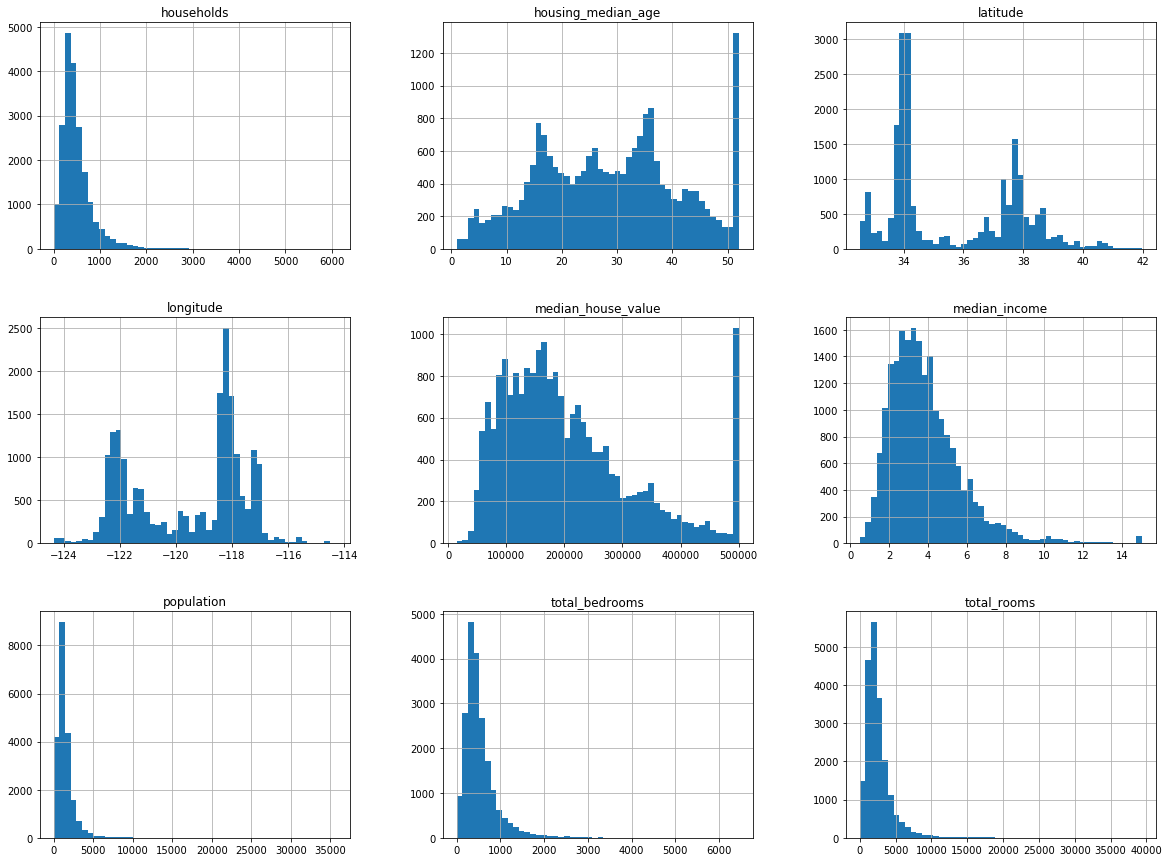

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

This following method shows how to see what the histograms of the individual values looks like.


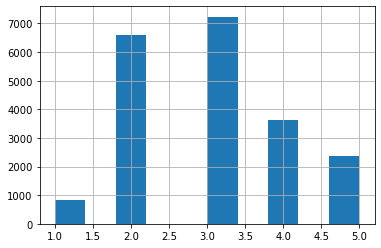

In [43]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

# And then let's drop the "income_cat" attribute to keep the data pristine
housing.drop("income_cat", axis=1, inplace=True)

Let's examine the housing data to ensure that it has the correct tables


In [44]:
print (housing.info())
housing.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Sampling

Sampling a test set and keeping it aside, so that it never gets involved in training

In [45]:
import numpy as np

def split_training(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    # Since we provided a random seed, these values will
    # be the same for every subsequent run
    # print(test_indices[:20])
    
    return data.iloc[train_indices], data.iloc[test_indices]


# Keep 20% (0.2) of the data aside for testing later
train_set, test_set = split_training(housing, 0.2)
print("Training data has %d elements" % len(train_set))
print("Testing data has %d elements" % len(test_set))

# This can also be done with train_test_split like this
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print("Training data has %d elements" % len(train_set))
print("Testing data has %d elements" % len(test_set))



Training data has 16512 elements
Testing data has 4128 elements
Training data has 16512 elements
Testing data has 4128 elements


That was purely random sampling. Sometimes you want to stratify your sampling to
allow for matching the population by their characteristics: ensure enough males/females
ensure enough lat/long spread, etc.

So here we do stratified sampling by income category instead.

[17606 18632 14650  3230  3555 19480  8879 13685  4937  4861]
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


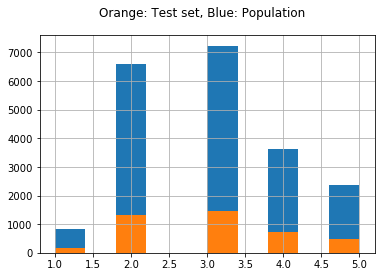

In [48]:
import pylab as pl

housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print(train_index[:10])
print (strat_test_set["income_cat"].value_counts() / len(strat_test_set))
test = pd.cut(strat_test_set["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
test.hist()
pl.suptitle("Orange: Test set, Blue: Population")
        
# And then let's drop the "income_cat" attribute to keep the data pristine
housing.drop("income_cat", axis=1, inplace=True)

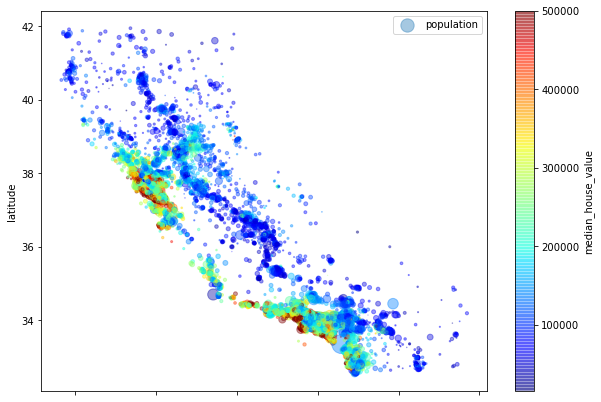

In [49]:
# Now we copy the data, so that we only work with the training set and never see the test set

housing = strat_train_set.copy()

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

Showing correlations between the variables. If you get the seaborn library, you can see the correlations between the variables and the "median_housing_value" which is the attribute we are trying to predict.

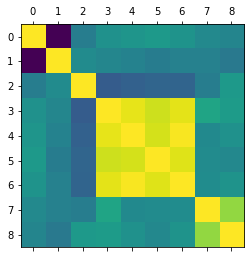

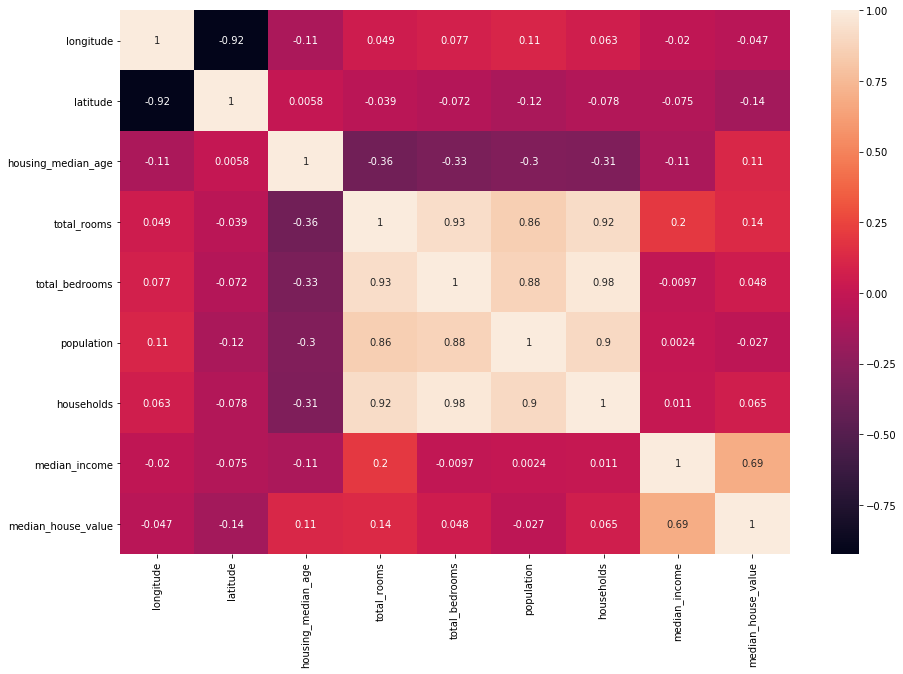

In [50]:
plt.matshow(housing.corr())
plt.show()

import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(housing.corr(), annot=True)


Try to look at the quantile-quantile plot for a single variable to see how close it is to the normal distribution.

((array([-3.93282025, -3.71427552, -3.59458582, ...,  3.59458582,
          3.71427552,  3.93282025]),
  array([ 0.4999,  0.4999,  0.4999, ..., 15.0001, 15.0001, 15.0001])),
 (1.7994812674068545, 3.875589365310079, 0.9444484808981951))

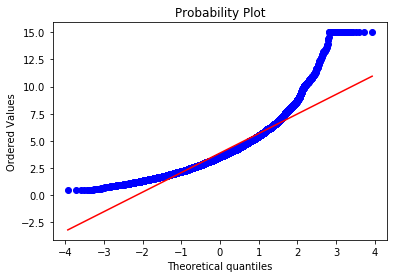

In [51]:
import scipy, matplotlib

scipy.stats.probplot(housing["median_income"], dist="norm", plot=matplotlib.pyplot)

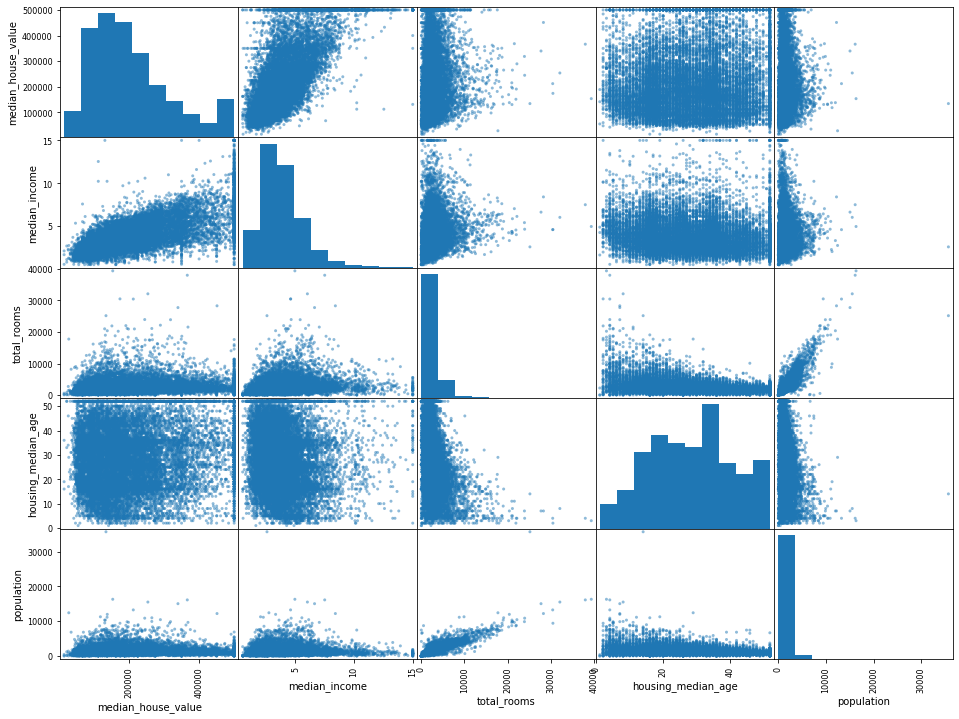

In [52]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "population"]
_=scatter_matrix(housing[attributes] ,figsize=(16, 12))

In [53]:
# Create new variables that might be better correlated

housing["rooms_per_household"] = housing["total_rooms"] / housing ["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing ["total_rooms"]
housing["population_per_household"] = housing["population"] / housing ["households"]

# And let's see how well the new variables work
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Preparing the data

Got to handle the missing values and other quirks



In [54]:
# The input attributes and the labels (known quantities we will be predicting)

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Check which values are 'na' (not available) and hence have to be filled in. 
na_indices = np.where(pd.isna(housing["ocean_proximity"]) == True)

na_indices

# We could drop the na values in one of these ways

# Drop only the na rows
# housing.dropna(subset=["total_bedrooms"])

# Drop the entire attribute!
# housing.drop("total_bedrooms", axis=1)

# Fill it in with the median
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)


# If we have any 'na' values, we would use an Imputer to find the means
# and then fill them in.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# The "ocean_proximity" attribute is categorical. The rest are numerical, and thus
# their medians can be calculated
housing_num = housing.drop("ocean_proximity", axis=1)

# Calculate the medians here
imputer.fit(housing_num)

print(imputer.statistics_)
print (housing_num.median().values)

# Now we can use this trained imputer to transform the dataset to fill in the
# missing values with medians across the board
X = imputer.transform(housing_num)

# A normal Pandas dataframe can be created out of this array like this
housing_transformed = pd.DataFrame(X, columns=housing_num.columns,
                                    index=housing_num.index)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409    3.    ]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409    3.    ]


The housing_cat variable is the only categorical variable, so the book examines it and then converts it into
a on hot encoding of various choices. I think it would be better to make it odinal

In [55]:
housing[["ocean_proximity"]].head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [56]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])


In [57]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [58]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

There's no easy way to change the categories. You can renumber these values after the encoder has run.

The book really wants us to use a one-hot array with individual values for each of the categories.

In [59]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Creating your own custom transformer. You do this to pre-process the data in the way
that you want, and so it can be included in a data pipeline


In [60]:
from sklearn.base import BaseEstimator, TransformerMixin



# Indices of the various columns in X
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args, or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        " Nothing done to fit "
        return self; # Nothing to fit
    
    def transform(self, X):
        "Adds the all derived attributes as columns"
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,
                         rooms_per_household, 
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, 
                         rooms_per_household,
                         population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [61]:
housing_extra_attribs


array([[-121.89, 37.29, 38.0, ..., 2, 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., 5, 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 2, 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 3, 6.34640522875817, 2.742483660130719],
       [-118.01, 33.82, 31.0, ..., 3, 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 3, 4.843505477308295,
        1.9859154929577465]], dtype=object)

# Feature scaling and Transformation Pipelines

We need to scale the features (values, not the predictions) so that convergence of
most methods is faster

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Add this later to clear variables
# %reset

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# This is the full pipeline, including stratified sampling.
# Load the data (no need to fetch it again)
housing = load_housing_data()

# First, generate income categories by binning median_income into five bins.
housing["income_category"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_category"]):
    # Assign test and training sets
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# And then let's drop the "income_category" attribute to keep the data pristine
housing.drop("income_category", axis=1, inplace=True)
strat_train_set.drop("income_category", axis=1, inplace=True)
strat_test_set.drop("income_category", axis=1, inplace=True)

# Now we copy the data, so that we only work with the training set and never see the test set
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# If we have any 'na' values, we would use an Imputer to find the means
# and then fill them in.
imputer = SimpleImputer(strategy="median")

# The "ocean_proximity" attribute is categorical. The rest are numerical, and thus
# their medians can be calculated
housing_num = housing.drop("ocean_proximity", axis=1)

# Calculate the medians here
imputer.fit(housing_num)


# Indices of the various columns in X
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args, or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        " Nothing done to fit "
        return self; # Nothing to fit
    
    def transform(self, X):
        "Adds the all derived attributes as columns"
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,
                         rooms_per_household, 
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, 
                         rooms_per_household,
                         population_per_household]

# The ordinal values (numbers)
number_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# The categorical values (categories)
number_attribs = list(housing_num)
# Just one, which is ocean_proximity
categorical_attribs = ["ocean_proximity"]

data_pipe = ColumnTransformer([
    ('number', number_pipe, number_attribs),
    ('categorical', OneHotEncoder(), categorical_attribs)
])

housing_prepared = data_pipe.fit_transform(housing)


# Training a model

Having prepared the model thus, we can proceed to training the model. We try different systems: Linear Regression
Decision Trees, Decision Forests, and an ensemble method. The goal is to reduce mean square of errors since all values
are alike, and we want a model that is close enough to the house prices to be able to predict them in tne future.

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
small_X = housing.iloc[:5]
small_y = housing_labels.iloc[:5]

X_prep = data_pipe.transform(small_X)
print ("Predictions: ", lin_reg.predict(X_prep))
print ("Observed: ", list(small_y))

Predictions:  [210808. 317888. 211072.  59120. 189832.]
Observed:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [65]:
# Let's calculate the errors
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

linear_rMSE = np.sqrt(mean_squared_error(housing_labels, housing_predictions))

print("Linear regression: Root Mean Squared error: ", linear_rMSE)

Linear regression: Root Mean Squared error:  68628.32198090691


Let's compare this to the values that are in the labeled data. looks like the range is [14k, 500k] and is capped at 500k, so the error of 68k is significant.

In [66]:
housing_labels.describe()
housing_labels.std()

115703.01483031621

Let's define a function that will print the errors versus the range so we can see how big the error is in this case


In [67]:
def showRmsError(estimator, X, y, label="Estimator"):
    y_predicted = estimator.predict(X)
    rMSE = np.sqrt(mean_squared_error(y, y_predicted))
    true_range = y.max() - y.min()
    percent = (rMSE * 1.0) / true_range
    print (label, " has a squared root mean square error of ", rMSE)
    print ("This is roughly %.2f%% of the range" % percent)
    print ("Here are the mean (%f) and standard deviation(%f) of the true range." % (y.mean(), y.std()))
    print ("The RMS error is %.2f%% of the standard deviation " % (rMSE*1.0/y.std()))

In [68]:
showRmsError(lin_reg, housing_prepared, housing_labels, "Linear estimator")

Linear estimator  has a squared root mean square error of  68628.32198090691
This is roughly 0.14% of the range
Here are the mean (206990.920724) and standard deviation(115703.014830) of the true range.
The RMS error is 0.59% of the standard deviation 


In [69]:
# Let's try a decision trees
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
showRmsError(tree_reg, housing_prepared, housing_labels, "Decision Tree Estimator")

Decision Tree Estimator  has a squared root mean square error of  0.0
This is roughly 0.00% of the range
Here are the mean (206990.920724) and standard deviation(115703.014830) of the true range.
The RMS error is 0.00% of the standard deviation 


# Cross validation

Since the Decision Tree Estimator is over-fitting, then adjust by doing cross validation


In [70]:
from sklearn.model_selection import cross_val_score

def display_scores(label, scores):
    print ("------------ RMS Error for %s -----------" % label)
    print ("Scores: ", scores)
    print ("Mean: ", scores.mean())
    print ("Standard deviation: ", scores.std())

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)    
display_scores("Decision Tree", tree_rmse_scores)


# Try it out with Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores("Linear Regression", lin_rmse_scores)

------------ RMS Error for Decision Tree -----------
Scores:  [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean:  70666.74616904806
Standard deviation:  2928.322738055112
------------ RMS Error for Linear Regression -----------
Scores:  [66741.34802706 66954.28467476 70347.95244419 74752.61517811
 68030.34776633 71209.64167322 64983.78603837 68277.12200781
 71553.25720988 67665.01799113]
Mean:  69051.53730108745
Standard deviation:  2737.627156339376


In [71]:
# Let's try that a hundred times to see what we find

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=100)
tree_rmse_scores = np.sqrt(-tree_scores)    
display_scores("Decision Tree", tree_rmse_scores)


# Try it out with Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=100)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores("Linear Regression", lin_rmse_scores)


------------ RMS Error for Decision Tree -----------
Scores:  [79092.11990705 74455.95476562 70231.44588859 66844.01619627
 83003.43724952 72089.95414056 74623.76713696 68782.59406143
 66781.46882439 63649.84487824 62268.40468275 72289.23984712
 70453.84351117 68143.16417874 61173.19063263 68607.72733256
 60501.49770287 56140.75114761 85504.82256858 63677.05417105
 59861.86248882 77838.19349974 78204.06639842 67327.69632288
 67312.09859314 64815.50011977 63442.08339494 74310.10229482
 85944.14858045 72422.56561133 74623.99900792 70211.53489809
 69644.11657393 71401.34673227 71370.43064854 71996.37833526
 63100.84364835 79569.19857103 69757.822831   77354.53621346
 74616.30835666 72061.20570253 74880.09878454 70362.68359337
 76191.18018666 61465.69679462 68713.28493177 66362.80593046
 55300.63009154 75895.27066393 86547.53552547 69792.04160621
 63309.44143309 64384.64195777 72108.68653637 61000.08974678
 73029.36967545 70197.83753921 75767.67402999 71016.21206316
 70752.53104833 60700.0

In [72]:
# What if we only did this five times?

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)    
display_scores("Decision Tree", tree_rmse_scores)


# Try it out with Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores("Linear Regression", lin_rmse_scores)

------------ RMS Error for Decision Tree -----------
Scores:  [69289.85472469 69702.23846842 73531.8338684  70870.73844685
 72808.91365538]
Mean:  71240.71583274902
Standard deviation:  1674.4026513232816
------------ RMS Error for Linear Regression -----------
Scores:  [66916.57831848 72625.77327299 69645.44005173 66634.43244525
 69764.38787921]
Mean:  69117.32239353251
Standard deviation:  2191.567774740121


Looks like the $\sigma$ increases as we have more cross validation folks. Why is that?

Perhaps we need to divide by the number of steps?

In [73]:
# Why does the cross validation need a trained model? If I understand correctly,
# it is trained on n-1 folds, and 1 fold is kept for validation. If that is true,
# then we should be able to take an untrained estimator, and get similar values (modulo
# choice of folds). Let's try that.

tree_reg_untrained = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_reg_untrained, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)    
display_scores("Decision Tree", tree_rmse_scores)


# Try it out with Linear Regression
lin_reg_untrained = LinearRegression()
lin_scores = cross_val_score(lin_reg_untrained, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores("Linear Regression", lin_rmse_scores)

------------ RMS Error for Decision Tree -----------
Scores:  [68131.071302   70009.34112652 73215.16429484 70839.68322248
 72342.73206564]
Mean:  70907.59840229411
Standard deviation:  1783.5386356299273
------------ RMS Error for Linear Regression -----------
Scores:  [66916.57831848 72625.77327299 69645.44005173 66634.43244525
 69764.38787921]
Mean:  69117.32239353251
Standard deviation:  2191.567774740121


And that's true. You don't need a trained estimator. You just need an estimator created.
This is great. Learning things!

In [74]:
# A random forest creates a few decision trees and averages their output.
# For housing, it would be a lot better to create decision tree models that are location/zip
# code specific, and then use those in an ensemble method.

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)    
display_scores("Decision Tree", tree_rmse_scores)

------------ RMS Error for Decision Tree -----------
Scores:  [68131.071302   70009.34112652 73215.16429484 70839.68322248
 72342.73206564]
Mean:  70907.59840229411
Standard deviation:  1783.5386356299273


In [75]:
# Train it on the full data, and see if it overfits on the full data.
forest_reg.fit(housing_prepared, housing_labels)

showRmsError(forest_reg, housing_prepared, housing_labels, "Random Forest Estimator")

Random Forest Estimator  has a squared root mean square error of  18825.469983239134
This is roughly 0.04% of the range
Here are the mean (206990.920724) and standard deviation(115703.014830) of the true range.
The RMS error is 0.16% of the standard deviation 


Ah, so you run the error on the fully labeled, prepared data and then run cross-validation to see how well the system *will* perform on unseen data. That's the point.

So in the above example, the Random Forest have impressively small error: 18k on the data,
but when we use cross validation, we realize that on the test set, the errors are actually
quite high: 71k or so. So the Random Forest is overfitting the training data, and will
perform much worse on information it hasn't seen.

However, if we are to see the regression as a way of *capturing* the data from the data,
then the regressor is a good estimator for data seen already.

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap': [True], 'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
]

# We want to search for best parameters for a Random Forest regressor
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

# Now train the model with all the choices
grid_search.fit(housing_prepared, housing_labels)

# grid_search.fit(housing_prepared, housing_labels)
showRmsError(grid_search, housing_prepared, housing_labels, "Grid Search Estimator")


Grid Search Estimator  has a squared root mean square error of  0.0
This is roughly 0.00% of the range
Here are the mean (206990.920724) and standard deviation(115703.014830) of the true range.
The RMS error is 0.00% of the standard deviation 


Let's get the best estimator here and examine what we found

In [77]:
selected_estimator = grid_search.best_estimator_

grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 30}

In [78]:
# The cross_validation results:
cvres = grid_search.cv_results_
for mean_score, params in sorted(zip(cvres["mean_test_score"], cvres["params"])):
    print(np.sqrt(-mean_score), params)

65888.82337677912 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
63035.862713409464 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
60135.39626160216 {'bootstrap': True, 'max_features': 4, 'n_estimators': 3}
58985.553365822816 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
58953.325359707764 {'bootstrap': True, 'max_features': 6, 'n_estimators': 3}
58798.09276130235 {'bootstrap': True, 'max_features': 8, 'n_estimators': 3}
57650.39784039211 {'bootstrap': False, 'max_features': 8, 'n_estimators': 3}
57215.77637985234 {'bootstrap': False, 'max_features': 6, 'n_estimators': 3}
55723.81030118046 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
54407.70058083387 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
53163.74365883428 {'bootstrap': True, 'max_features': 4, 'n_estimators': 10}
52843.41609715836 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
52337.39969987106 {'bootstrap': True, 'max_features': 8, 'n_estimators': 10}

Let's see what the important attributes were and do a final evaluation of the system

In [79]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.50718761e-02, 6.94583022e-02, 4.42431347e-02, 1.80328702e-02,
       1.57740874e-02, 1.69968151e-02, 1.56853521e-02, 3.08915484e-01,
       5.55799517e-02, 1.13061608e-01, 8.23521677e-02, 9.54405140e-03,
       1.69019882e-01, 8.82044416e-05, 2.62290864e-03, 3.55330443e-03])

In [80]:
# Let's see them next to attribute names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = data_pipe.named_transformers_["categorical"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

# All the names of attributes
attributes_all = number_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes_all), reverse=True)

[(0.30891548384029655, 'median_income'),
 (0.16901988162044226, 'INLAND'),
 (0.11306160845855978, 'pop_per_hhold'),
 (0.08235216773537128, 'bedrooms_per_room'),
 (0.07507187609504472, 'longitude'),
 (0.069458302187861, 'latitude'),
 (0.055579951654763114, 'rooms_per_hhold'),
 (0.04424313473638661, 'housing_median_age'),
 (0.01803287015336297, 'total_rooms'),
 (0.016996815105156955, 'population'),
 (0.015774087396542083, 'total_bedrooms'),
 (0.015685352103496898, 'households'),
 (0.009544051404096265, '<1H OCEAN'),
 (0.0035533044261674197, 'NEAR OCEAN'),
 (0.0026229086408042375, 'NEAR BAY'),
 (8.820444164801037e-05, 'ISLAND')]

# Final validation of the system against the test set

In [81]:
final_model = grid_search.best_estimator_

# Separate out input variables and actual labels
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Important to call transform and not fit_transform! We should not be fitting to the
# test set.
X_test_prepared = data_pipe.transform(X_test)

showRmsError(final_model, X_test_prepared, y_test, "Final model")

Final model  has a squared root mean square error of  47693.385781251105
This is roughly 0.10% of the range
Here are the mean (206315.401647) and standard deviation(114170.048854) of the true range.
The RMS error is 0.42% of the standard deviation 


# Exercises


In [82]:
# Trying our RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# All the values to try
param_list = [
    {'bootstrap': [True, False]},
    {'n_estimators': [i for i in range(3, 30)]},
    {'max_features': [i for i in range(2, 8)]},
]

# We want to search for best parameters for a Random Forest regressor
forest_reg = RandomForestRegressor()
random_search = RandomizedSearchCV(forest_reg, param_list,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           n_iter = 5, # Test this out, and then increase when ready.
                          )

# Now train the model with all the choices
random_search.fit(housing_prepared, housing_labels)

# grid_search.fit(housing_prepared, housing_labels)
showRmsError(random_search, housing_prepared, housing_labels, "Randomized Search Estimator")


Randomized Search Estimator  has a squared root mean square error of  20222.715687019874
This is roughly 0.04% of the range
Here are the mean (206990.920724) and standard deviation(115703.014830) of the true range.
The RMS error is 0.17% of the standard deviation 


In [83]:
random_search.best_params_

{'n_estimators': 22}

In [84]:
# Exercise 4. Create a single pipeline that prepares the data and does the prediction

# We have two things to do: prepare the data using the existing data pipeline,
# And then predicting using the final model.
predict_pipe = Pipeline([
    ('preparation', data_pipe),
    ('prediction', final_model)
])

y_prediction = predict_pipe.predict(X_test)
rMSE = np.sqrt(mean_squared_error(y_test, y_prediction))
print(rMSE)

# But if you apply the steps separately, you get a different answer!
X_test_prep = data_pipe.transform(X_test)
y_pred2 = final_model.predict(X_test_prep)
rMSE = np.sqrt(mean_squared_error(y_test, y_pred2))
print(rMSE)


47693.385781251105
47693.385781251105


In [85]:
# Let's try Ridge regression to see if it produces better estimates
# Ridge regression with the closed-form Normal equation

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(housing_prepared, housing_predictions)

showRmsError(ridge_reg, housing_prepared, housing_labels, "Normal Equation, Ridge Regression Estimator")

Normal Equation, Ridge Regression Estimator  has a squared root mean square error of  68629.57436947298
This is roughly 0.14% of the range
Here are the mean (206990.920724) and standard deviation(115703.014830) of the true range.
The RMS error is 0.59% of the standard deviation 


In [86]:
print(housing_prepared.shape)
print(housing_labels.shape)

(16512, 16)
(16512,)


In [87]:
housing_prepared.shape


(16512, 16)